In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive, files
drive.mount('/content/gdrive/')
path = '/content/gdrive/My Drive/np_arrays/'
models_path = '/content/gdrive/My Drive/np_arrays/models/'
data_path = '/content/gdrive/My Drive/np_arrays/datasets/'

Using TensorFlow backend.


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
batch_size = 32
num_classes = 2
epochs = 25
data_augmentation = True
num_predictions = 20

x_train = np.load(data_path + "trainset_karma1.npy")
y_train = np.load(data_path + "traintype_karma1.npy")

x_test = np.load(data_path + "testset_karma1.npy")
y_test = np.load(data_path + "testtype_karma1.npy")
num_classes = 7

In [0]:
print(y_train[:15])

[[5]
 [5]
 [3]
 [5]
 [0]
 [1]
 [1]
 [5]
 [4]
 [1]
 [0]
 [4]
 [0]
 [2]
 [5]]


Text(0.5, 1.0, '1')

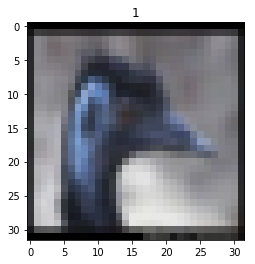

In [0]:
#Visualize image and label
i = 100
rgb = x_train[i] 
plt.imshow(rgb)
plt.title(int(y_train[i]))

In [0]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(33600, 32, 32, 3)
(33600, 1)
(8400, 32, 32, 3)
(8400, 1)


In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
y_train[:15]

array([[0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True
              )

Train on 33600 samples, validate on 8400 samples
Epoch 1/25
33600/33600 [==============================] - 198s 6ms/step - loss: 1.3640 - acc: 0.4510 - val_loss: 2.1010 - val_acc: 0.2846
Epoch 2/25
33600/33600 [==============================] - 194s 6ms/step - loss: 1.0824 - acc: 0.5836 - val_loss: 1.8983 - val_acc: 0.3029
Epoch 3/25
33600/33600 [==============================] - 193s 6ms/step - loss: 0.9169 - acc: 0.6538 - val_loss: 1.9299 - val_acc: 0.3289
Epoch 4/25
33600/33600 [==============================] - 194s 6ms/step - loss: 0.8241 - acc: 0.6901 - val_loss: 1.9529 - val_acc: 0.3324
Epoch 5/25
33600/33600 [==============================] - 194s 6ms/step - loss: 0.7661 - acc: 0.7148 - val_loss: 2.0263 - val_acc: 0.3192
Epoch 6/25
33600/33600 [==============================] - 194s 6ms/step - loss: 0.7143 - acc: 0.7363 - val_loss: 1.9927 - val_acc: 0.3365
Epoch 7/25
33600/33600 [==============================] - 192s 6ms/step - loss: 0.6785 - acc: 0.7499 - val_loss: 1.8240 - v

In [0]:
import h5py
model.save(models_path + "cifar10_karma1.h5") #saves the trained model